<a href="https://colab.research.google.com/github/jithesh9539/Dimensionality_Reduction_Technique/blob/main/Dimensionality_Reduction_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
import plotly.io as plt_io
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')
import umap

In [3]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel
!pip install -U scikit-learn

     |████████████████████████████████| 86 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 9.1 MB/s 
     |████████████████████████████████| 15.8 MB 591 bytes/s 
     |████████████████████████████████| 76 kB 5.5 MB/s 
     |████████████████████████████████| 132 kB 51.3 MB/s 
     |████████████████████████████████| 793 kB 48.5 MB/s 
     |████████████████████████████████| 793 kB 38.6 MB/s 
     |████████████████████████████████| 791 kB 68.0 MB/s 
     |████████████████████████████████| 786 kB 56.2 MB/s 
     |████████████████████████████████| 779 kB 54.6 MB/s 
     |████████████████████████████████| 778 kB 36.4 MB/s 
     |████████████████████████████████| 776 kB 54.3 MB/s 
     |████████████████████████████████| 769 kB 41.6 MB/s 
     |████████████████████████████████| 766 kB 53.2 MB/s 
     |████████████████████████████████| 1.0 MB 29.4 MB/s 
     |████████████████████████████████| 722 kB 47.1 MB/s 
     |████████████████████████████████| 722 kB 46.4 MB/s 
     |██████████

     |████████████████████████████████| 23.2 MB 121 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [6]:
from google.colab import files
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


In [7]:
test=pd.read_csv('sign_mnist_test.csv')

In [8]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [9]:
test = test[test['label'] < 10]
y=test['label']
test.shape

(3135, 785)

In [10]:
x=test.drop(['label'],axis=1)
x.shape

(3135, 784)

In [11]:
x = x.values.reshape(-1,28,28,1)
print(x.shape)

(3135, 28, 28, 1)


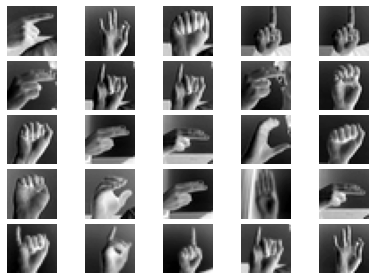

In [12]:
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(x[i].reshape(28,28), cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [13]:
x = np.reshape(x, (len(x), -1))/255

print(x.shape, y.shape)

(3135, 784) (3135,)


**PCA**

In [14]:
steps = [('scaling', StandardScaler()), ('pca', PCA(n_components=0.99))]
pipeline = Pipeline(steps)
pipeline.fit(x)

Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.99,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [15]:
pipeline['pca'].n_components_

107

In [16]:
reduced = pipeline.inverse_transform(pipeline.transform(x))

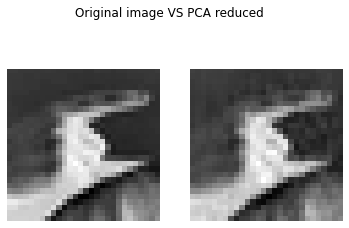

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x[0].reshape(28,28), cmap='gray_r')
ax2.matshow(reduced[0].reshape(28,28), cmap='gray_r')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y[0]))
plt.show()

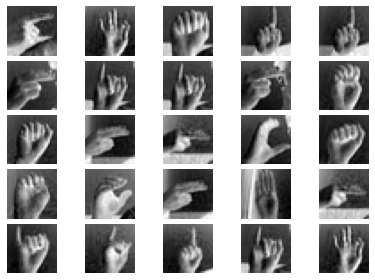

In [18]:
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(reduced[i].reshape(28,28), cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [19]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=10,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=800,height=400)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [20]:
def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=800,height=500)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [21]:

from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [22]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
x = StandardScaler().fit_transform(x)

In [23]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

Duration: 0.3253896236419678 seconds


In [24]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])


In [25]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

**SVD**

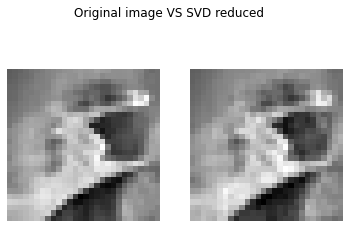

In [26]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(x)

image = svd.inverse_transform(X_svd[0].reshape(1, -1))

# let us visualize the PCA reduced number
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x[0].reshape(28,28), cmap='gray_r')
ax2.matshow(image.reshape(28,28), cmap='gray_r')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS SVD reduced".format(y[0]))
plt.show()

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
start = time.time()
SVD = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=3,
                                 algorithm='randomized',
                                 random_state=42,
                                 n_iter=5))
SVD.fit(x,y)
X_embedded = SVD.transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.3459129333496094 seconds


In [28]:
print(f"Dimensions of original image: {x[0].shape[0]}")
print(f"Dimensions of reduced image: {X_svd[0].shape[0]}")

Dimensions of original image: 784
Dimensions of reduced image: 100


In [29]:
plot_2d(X_embedded[:, 0],X_embedded[:, 1])

In [30]:
plot_3d(X_embedded[:, 0],X_embedded[:, 1],X_embedded[:, 2])

**TSNE**

In [31]:
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 37.995203256607056 seconds


In [32]:
plot_2d(tsne[:, 0],tsne[:, 1])

In [33]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

**UMAP**

In [34]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 25.54394245147705 seconds


In [35]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [36]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

**LLE**

In [37]:
from sklearn.manifold import LocallyLinearEmbedding
from datetime import datetime

start = time.time()
reducer = LocallyLinearEmbedding(n_components=3,eigen_solver='dense')
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 13.737156867980957 seconds


In [38]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [39]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])


In [41]:
from sklearn.manifold import Isomap

start = time.time()
reducer = Isomap(n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 10.29897427558899 seconds


In [42]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

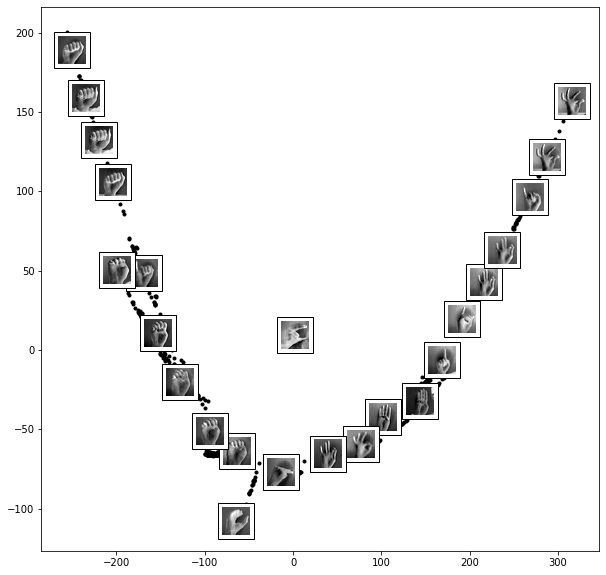

In [43]:
from sklearn.manifold import Isomap

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(x, model, images=x.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

In [44]:

plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

In [45]:
!pip install datasets
!pip install 'datasets[streaming]'
!pip install aiohttp

     |████████████████████████████████| 290 kB 4.9 MB/s 
     |████████████████████████████████| 59 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 45.5 MB/s 
     |████████████████████████████████| 243 kB 35.6 MB/s 
     |████████████████████████████████| 192 kB 50.5 MB/s 
     |████████████████████████████████| 271 kB 47.5 MB/s 
     |████████████████████████████████| 160 kB 64.4 MB/s 


In [46]:
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
import sklearn
from sklearn import manifold


In [47]:
!pip install -U scikit-learn

LLE: 15 sec
t-SNE: 43 sec
UMAP: 20 sec
ISOMAP: 11 sec
SVD: 0.38 sec
PCA: 0.37 sec


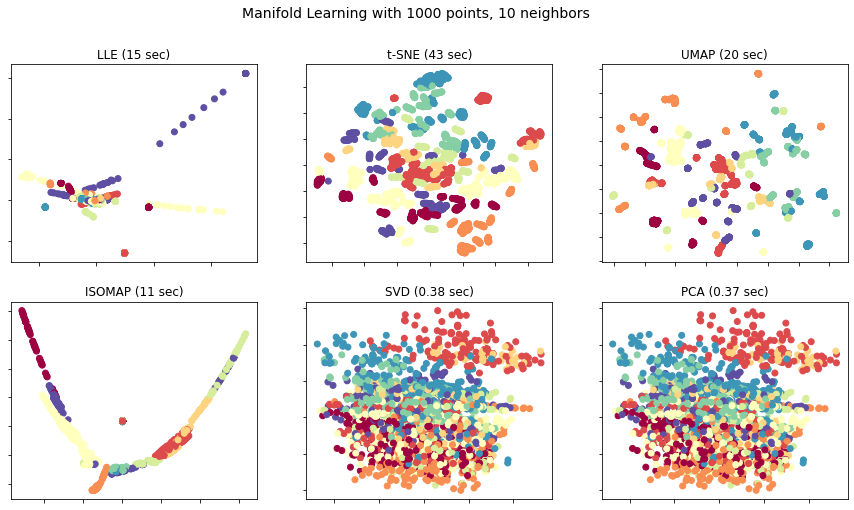

In [48]:
n_neighbors = 10
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['t-SNE'] =manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['UMAP'] = umap.UMAP(random_state=42)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(x)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=test.label, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()